In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
raw_data = pd.read_csv('TravelIns_data.csv',index_col=0)
raw_data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# 1. Exploratory Data Analysis
## 1.1 Missing Data

In [3]:
missing_values_count = raw_data.isnull().sum() 
pd.set_option('display.max_rows',20)
missing_values_count

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

#### There is no missing data in the dataset.

## 1.2 Visualizing and Exploring the Data

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

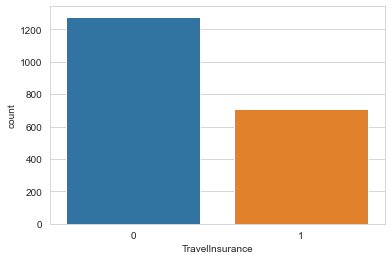

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='TravelInsurance',data=raw_data)

<AxesSubplot:xlabel='Age', ylabel='count'>

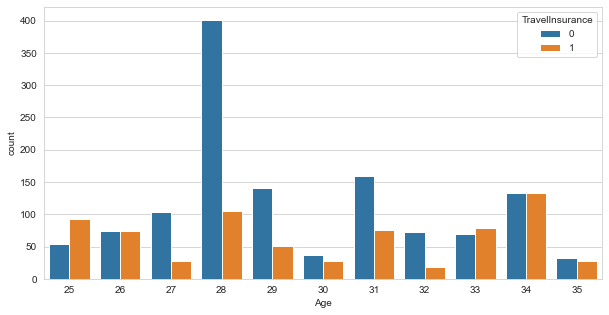

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age',hue='TravelInsurance',data=raw_data)

#### It looks like People whose age between 27 and 32 are less likely to buy travel insurance.

<AxesSubplot:xlabel='Employment Type', ylabel='count'>

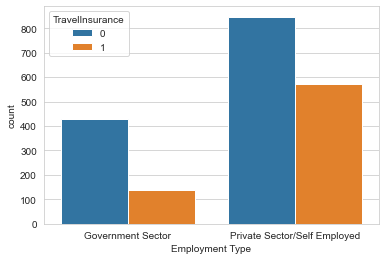

In [6]:
sns.countplot(x='Employment Type',hue='TravelInsurance',data=raw_data)

#### People who work in government sector are relatively less likely to buy travel insurance.

<AxesSubplot:xlabel='GraduateOrNot', ylabel='count'>

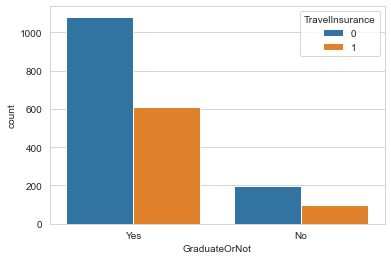

In [7]:
sns.countplot(x='GraduateOrNot',hue='TravelInsurance',data=raw_data)

In [8]:
graduate_buy = raw_data[(raw_data['GraduateOrNot'] == 'Yes') & (raw_data['TravelInsurance'] == 1)]
graduate =  raw_data[raw_data['GraduateOrNot'] == 'Yes' ]
print('Among colledge graduates, the proportion of buying travel insurance:',round(len(graduate_buy)/len(graduate)*100,2))

Among colledge graduates, the proportion of buying travel insurance: 36.11


In [9]:
#percentage of non-college graduates who  purchased travel insurance
nongraduate_buy = raw_data[(raw_data['GraduateOrNot'] == 'No') & (raw_data['TravelInsurance'] == 1)]
nongraduate =  raw_data[raw_data['GraduateOrNot'] == 'No' ]
print('Among non-colledge graduates, the proportion of buying travel insurance:',round(len(nongraduate_buy)/len(nongraduate)*100,2))

Among non-colledge graduates, the proportion of buying travel insurance: 33.56


#### Whether a college graduate or not has little effect on buying travel insurance.

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

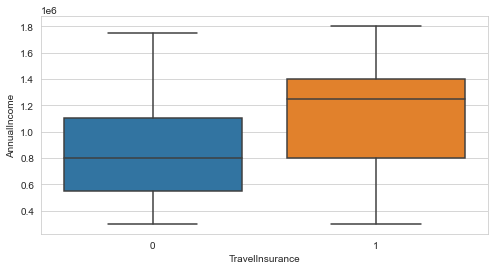

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='TravelInsurance',y='AnnualIncome',data=raw_data)

#### It seems that people who bought travel insurance have relatively higher income.

<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

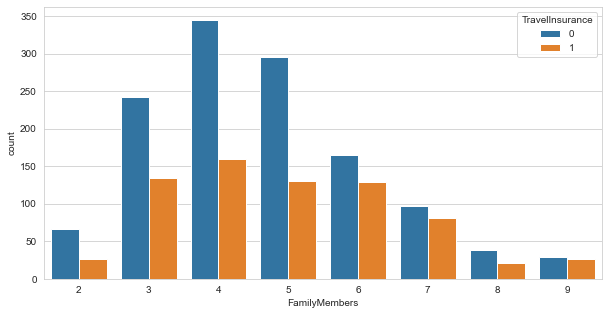

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilyMembers',hue='TravelInsurance',data=raw_data)

#### People having more family members are more likely to buy travel insurance.

<AxesSubplot:xlabel='ChronicDiseases', ylabel='count'>

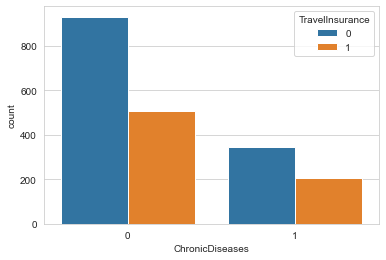

In [12]:
sns.countplot(x='ChronicDiseases',hue='TravelInsurance',data=raw_data)

In [13]:
chrodis_buy = raw_data[(raw_data['ChronicDiseases'] == 1) & (raw_data['TravelInsurance'] == 1)]
chrodis =  raw_data[raw_data['ChronicDiseases'] == 1 ]
print('Among people having chronic diseases, the proportion of buying travel insurance:',round(len(chrodis_buy)/len(chrodis)*100,2))

Among people having chronic diseases, the proportion of buying travel insurance: 37.14


In [14]:
not_chrodis_buy = raw_data[(raw_data['ChronicDiseases'] == 0) & (raw_data['TravelInsurance'] == 1)]
not_chrodis =  raw_data[raw_data['ChronicDiseases'] == 0 ]
print('Among people don\'t having chronic diseases, the proportion of buying travel insurance:',round(len(not_chrodis_buy)/len(not_chrodis)*100,2))

Among people don't having chronic diseases, the proportion of buying travel insurance: 35.19


#### Whether having a chronic disease or not has little effect on buying travel insurance.

<AxesSubplot:xlabel='FrequentFlyer', ylabel='count'>

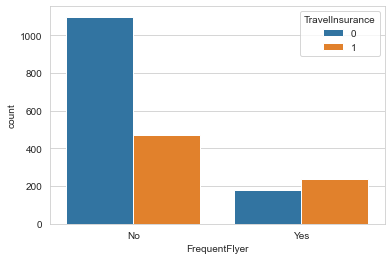

In [15]:
sns.countplot(x='FrequentFlyer',hue='TravelInsurance',data=raw_data)

#### People who fly often are more likely to buy insurance

<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='count'>

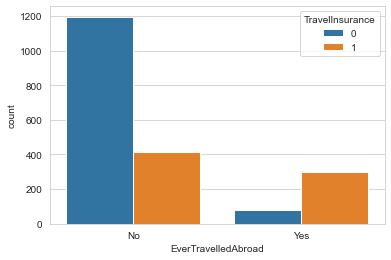

In [16]:
sns.countplot(x='EverTravelledAbroad',hue='TravelInsurance',data=raw_data)

#### People who have been travel abroad are more likely to buy insurance than those who have never been.

# 2. Data Cleaning

## 2.1 Converting Categorical Features 

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 219.8+ KB


In [18]:
#check how many type 
raw_data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [19]:
not_gov_sector = pd.get_dummies(raw_data['Employment Type'],drop_first=True)
raw_data['GraduateOrNot'] = raw_data['GraduateOrNot'] .map({'Yes':1,'No':0})
raw_data['FrequentFlyer'] = raw_data['FrequentFlyer'] .map({'Yes':1,'No':0})
raw_data['EverTravelledAbroad'] = raw_data['EverTravelledAbroad'] .map({'Yes':1,'No':0})

In [20]:
# drop categorical features 
raw_data.drop(['Employment Type'],axis=1,inplace=True)

In [21]:
data_cleaned = pd.concat([raw_data,not_gov_sector],axis=1)
data_cleaned.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Private Sector/Self Employed
0,31,1,400000,6,1,0,0,0,0
1,31,1,1250000,7,0,0,0,0,1
2,34,1,500000,4,1,0,0,1,1
3,28,1,700000,3,1,0,0,0,1
4,28,1,700000,8,1,1,0,0,1


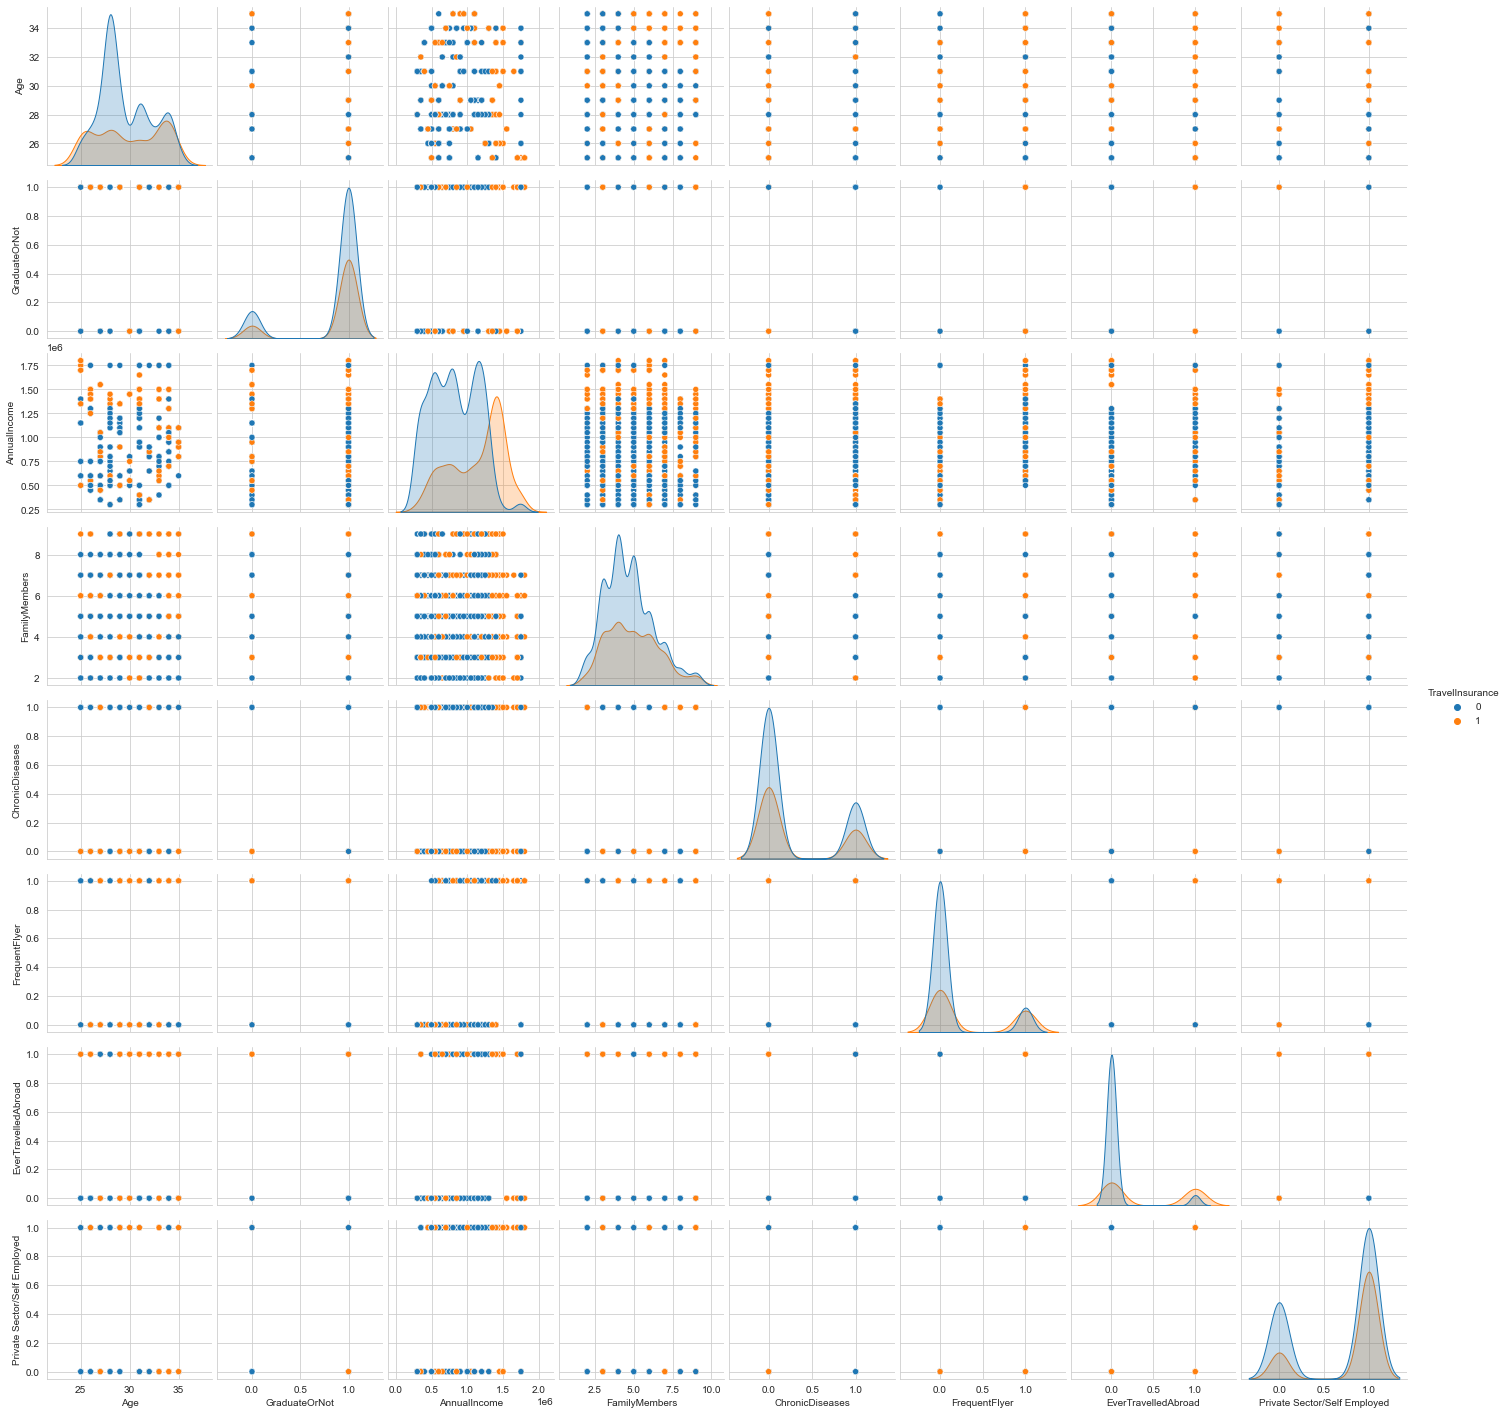

In [22]:
sns.pairplot(data_cleaned,hue='TravelInsurance')

#### It seems that both ChronicDiseases column and GraduateOrNot column have little effect on buying travel insurance.¶

# 3. Building Model

## 3.1 Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop(['TravelInsurance','ChronicDiseases','GraduateOrNot'],axis=1), 
                                                    data_cleaned['TravelInsurance'], test_size=0.3, 
                                                    random_state=100)

## 3.2 Training and Predicting

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [27]:
predictions = rfc.predict(X_test)

## 3.3 Evaluation

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,predictions)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,342,36
Actual 1,82,137


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       378
           1       0.79      0.63      0.70       219

    accuracy                           0.80       597
   macro avg       0.80      0.77      0.78       597
weighted avg       0.80      0.80      0.80       597

